# Tesla Deaths In the World

## WHY?


# Overall

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

%matplotlib inline

In [18]:
plt.rcParams["figure.figsize"] = (10, 5)


In [19]:
saved_style_state = matplotlib.rcParams.copy() 

In [37]:
import os

# 列出当前目录中的文件
print(os.listdir())

['.ipynb_checkpoints', 'Tesla_Dealth.csv', '.git', '.gitignore', 'Tesla_Death.zip', 'README.md', 'data_introduction', 'Untitled Folder', '.DS_Store']


In [39]:
if os.path.isfile("Tesla_Dealth.csv"):
    filepath = "Tesla_Dealth.csv"
    print("loading from file")

penalty_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [41]:
penalty_data.shape

(254, 21)

In [43]:
penalty_data.columns = [ct.strip() for ct in penalty_data.columns]

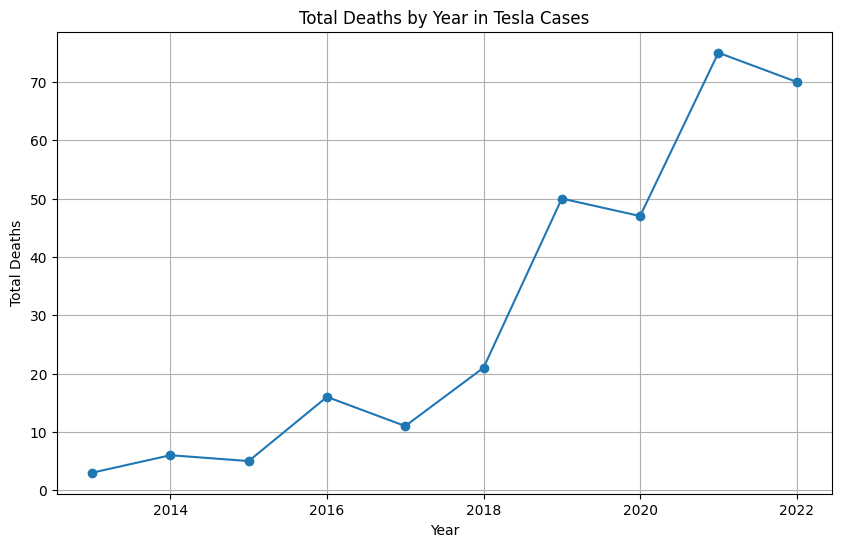

In [46]:
penalty_data['Deaths'] = pd.to_numeric(penalty_data['Deaths'], errors='coerce')
yearly_deaths = penalty_data.groupby('Year')['Deaths'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Year in Tesla Cases')
plt.grid(True)
plt.show()

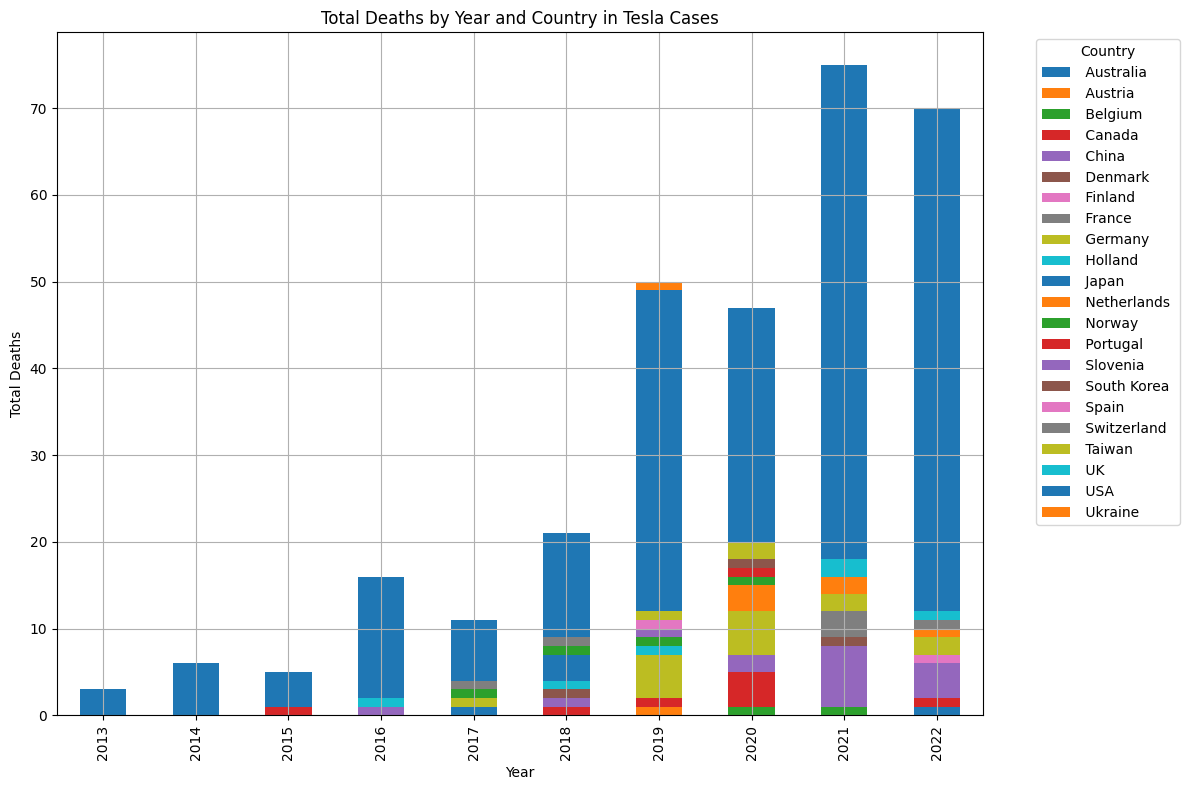

In [47]:
penalty_data.columns = penalty_data.columns.str.strip()

# Group the data by year and country, and sum the deaths for each group
yearly_country_deaths = penalty_data.groupby(['Year', 'Country'])['Deaths'].sum().unstack().fillna(0)

# Plot the data using a bar chart
yearly_country_deaths.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Year and Country in Tesla Cases')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

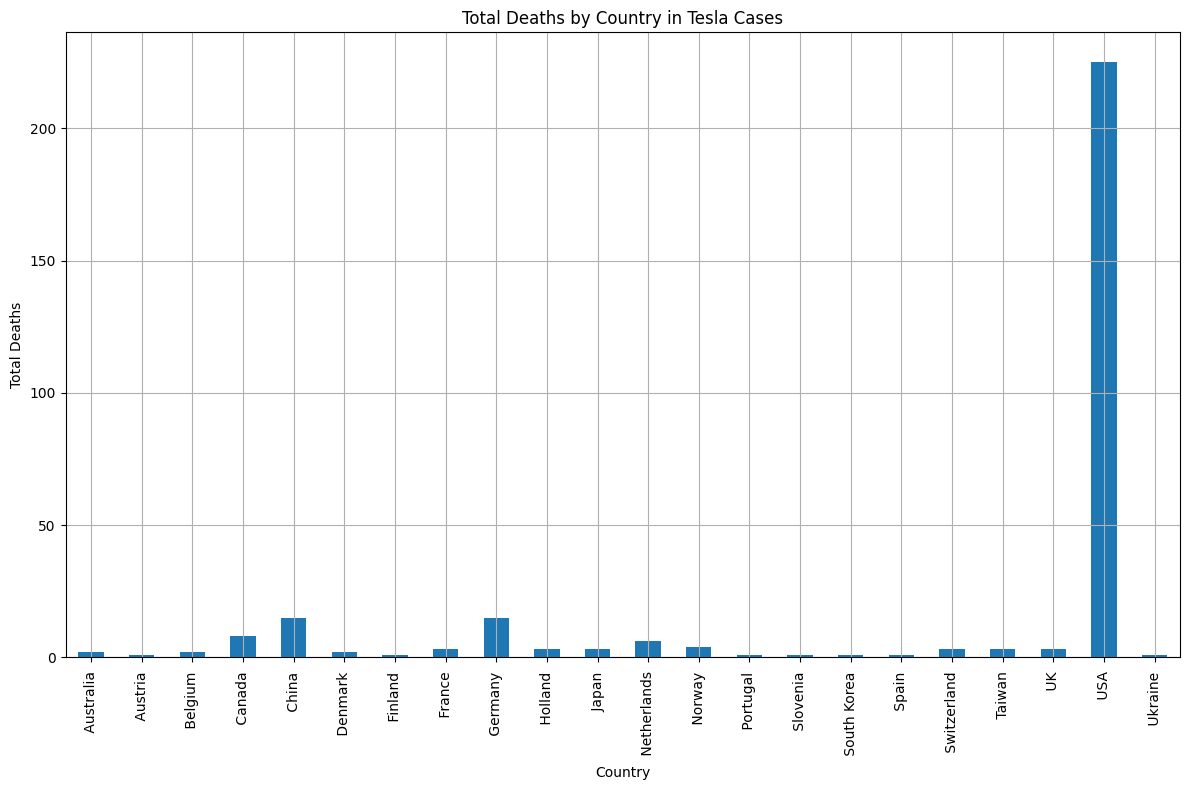

In [48]:
penalty_data.columns = penalty_data.columns.str.strip()

# Group the data by country and sum the deaths for each country
country_deaths = penalty_data.groupby('Country')['Deaths'].sum()

# Plot the data using a bar chart
plt.figure(figsize=(12, 8))
country_deaths.plot(kind='bar')

plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Country in Tesla Cases')
plt.grid(True)
plt.tight_layout()

In [49]:
penalty_data.columns = penalty_data.columns.str.strip()

# 定义关键词分类
categories = {
    "Motorcycle/Cyclist": ["Motorcycle", "motorcycle", "bicyclist", "Motorcyclist", "motorcyclist", "cyclist"],
    "Tree": ["tree"],
    "Cliff": ["cliff"],
    "Pedestrian": ["pedestrian"],
    "Collision": ["collision"]
}

# 统计每个类别出现的次数
category_counts = {category: 0 for category in categories}

for category, keywords in categories.items():
    for keyword in keywords:
        category_counts[category] += penalty_data['Description'].str.contains(keyword, case=False, na=False).sum()

print(category_counts)

{'Motorcycle/Cyclist': np.int64(51), 'Tree': np.int64(21), 'Cliff': np.int64(5), 'Pedestrian': np.int64(23), 'Collision': np.int64(26)}


{'Motorcycle/Cyclist': np.int64(51), 'Tree': np.int64(21), 'Cliff': np.int64(5), 'Pedestrian': np.int64(23), 'Collision': np.int64(26)}


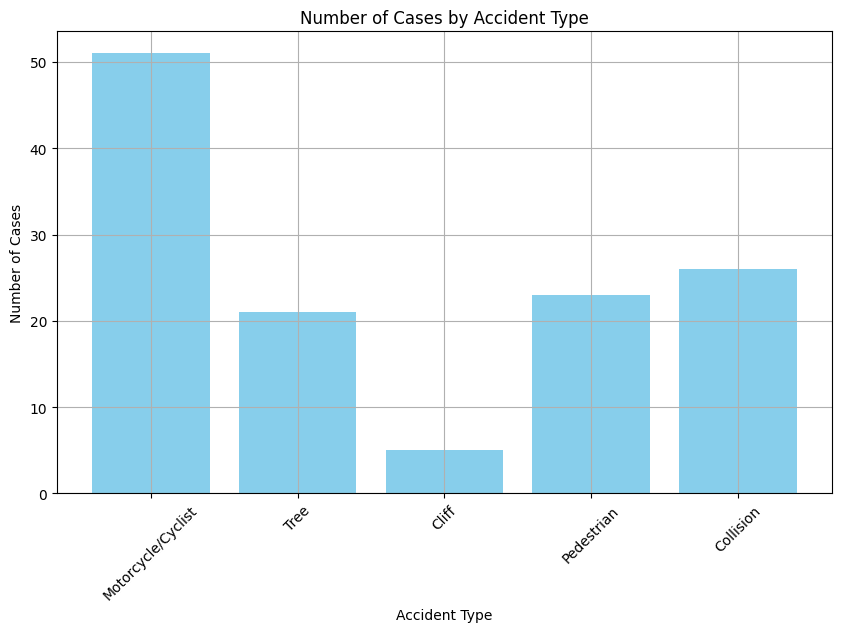

In [50]:
category_counts = {category: 0 for category in categories}

for category, keywords in categories.items():
    for keyword in keywords:
        category_counts[category] += penalty_data['Description'].str.contains(keyword, case=False, na=False).sum()

print(category_counts)

plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')

plt.xlabel('Accident Type')
plt.ylabel('Number of Cases')
plt.title('Number of Cases by Accident Type')
plt.xticks(rotation=45)
plt.grid(True)

In [9]:
import os
import geopandas as gp
import shapely
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


shp_file_name = r"world-administrative-boundaries.shp"
zip_file_name = "world-administrative-boundaries.zip"

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [8]:

import sys
print(sys.version)

3.10.13 (main, Jul 11 2024, 16:23:02) [GCC 9.4.0]


In [10]:
shp_file_path = 'world-administrative-boundaries.shp'  # 确认文件名和路径正确

# 尝试读取形状文件
try:
    gdf = gp.read_file(shp_file_path)
    print("Shapefile loaded successfully.")
    print(gdf.head())
except Exception as e:
    print(f"Error loading shapefile: {e}")
    gdf = None

if gdf is not None:
    # 读取你的死亡数据
    csv_file_path = 'Tesla_Dealth.csv'  # 确保路径正确
    try:
        penalty_data = pd.read_csv(csv_file_path)
        print("CSV file loaded successfully.")
        print(penalty_data.head())
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        penalty_data = None

    if penalty_data is not None:
        # 确保数据框中包含'Country'和'Deaths'列
        if 'Country' in penalty_data.columns and 'Deaths' in penalty_data.columns:
            # 按国家分组并计算每个国家的死亡人数总和
            country_deaths = penalty_data.groupby('Country')['Deaths'].sum().reset_index()

            # 将数据框转换为GeoDataFrame
            geo_data = gdf.set_index('name').join(country_deaths.set_index('Country'))

            # 绘制地图
            fig, ax = plt.subplots(1, 1, figsize=(15, 10))
            geo_data.plot(column='Deaths', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

            plt.title('Number of Deaths by Country')
            plt.show()
        else:
            print("The dataframe does not contain 'Country' or 'Deaths' column.")
else:
    print("Shapefile could not be loaded.")

Shapefile loaded successfully.
   iso3        status color_code                                        name  \
0   UGA  Member State        UGA                                      Uganda   
1   UZB  Member State        UZB                                  Uzbekistan   
2   IRL  Member State        IRL                                     Ireland   
3   ERI  Member State        ERI                                     Eritrea   
4  None  UK Territory        GBR  South Georgia & the South Sandwich Islands   

    continent           region iso_3166_1_  \
0      Africa   Eastern Africa          UG   
1        Asia     Central Asia          UZ   
2      Europe  Northern Europe          IE   
3      Africa   Eastern Africa          ER   
4  Antarctica             None        None   

                                  french_shor  \
0                                     Ouganda   
1                                 Ouzbékistan   
2                                     Irlande   
3              

In [45]:
burbs = gp.read_file(shp_file_name) 
#gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
burbs.sample(10)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
38,BLZ,Member State,BLZ,Belize,Americas,Central America,BZ,Belize,"MULTIPOLYGON (((-87.819 17.429, -87.832 17.417..."
122,MMR,Member State,MMR,Myanmar,Asia,South-Eastern Asia,MM,Myanmar,"MULTIPOLYGON (((98.156 9.877, 98.136 9.84, 98...."
209,TKM,Member State,TKM,Turkmenistan,Asia,Central Asia,TM,Turkménistan,"POLYGON ((66.538 37.366, 66.512 37.362, 66.49 ..."
188,PSE,Occupied Territory (under review),XXX,Gaza Strip,Asia,Western Asia,PS,État de Palestine,"POLYGON ((34.268 31.217, 34.239 31.295, 34.217..."
11,GUF,FR Territory,FRA,French Guiana,Americas,South America,GF,French Guiana,"POLYGON ((-51.684 4.034, -51.704 4.026, -51.72..."
56,ITA,Member State,ITA,Italy,Europe,Southern Europe,IT,Italie,"MULTIPOLYGON (((15.529 38.137, 15.504 38.079, ..."
30,LUX,Member State,LUX,Luxembourg,Europe,Western Europe,LU,Luxembourg,"POLYGON ((6.362 49.459, 6.328 49.469, 6.303 49..."
35,JAM,Member State,JAM,Jamaica,Americas,Caribbean,JM,Jamaïque,"POLYGON ((-77.689 18.486, -77.64 18.479, -77.6..."
136,TUR,Member State,TUR,Turkey,Asia,Western Asia,TR,Turquie,"MULTIPOLYGON (((25.824 40.1, 25.732 40.093, 25..."
105,EGY,Member State,EGY,Egypt,Africa,Northern Africa,EG,Égypte,"POLYGON ((34.217 31.323, 34.239 31.295, 34.268..."


iso3                                                         UGA
status                                              Member State
color_code                                                   UGA
name                                                      Uganda
continent                                                 Africa
region                                            Eastern Africa
iso_3166_1_                                                   UG
french_shor                                              Ouganda
geometry       POLYGON ((33.92110000000008 -1.001939999999933...
Name: 0, dtype: object


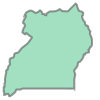

In [46]:
a = burbs.iloc[0]
print(a)
a.geometry

In [63]:
shapefile_path = "ne_110m_admin_0_countries.shp"

# 尝试读取 shapefile
try:
    world = gp.read_file(shapefile_path)
    base = world.plot(color='white', edgecolor='black')
except Exception as e:
    print(f"Error loading shapefile: {e}")

Error loading shapefile: Unable to open ne_110m_admin_0_countries.shx or ne_110m_admin_0_countries.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.


In [2]:
import sys
print(sys.executable)

/usr/local/python/3.10.13/bin/python3


In [1]:
!pip install fiona

import fiona
print(fiona.__version__)

ModuleNotFoundError: No module named 'fiona'

In [69]:
shapefile_path = "ne_110m_admin_0_countries.shp"

# 加载 Shapefile 文件
world = gp.read_file(shapefile_path)

# 绘制地图


DataSourceError: Unable to open ne_110m_admin_0_countries.shx or ne_110m_admin_0_countries.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [64]:
import geopandas as gpd
from fiona import Env

shapefile_path = "ne_110m_admin_0_countries.shp"

with Env(SHAPE_RESTORE_SHX='YES'):
    try:
        world = gpd.read_file(shapefile_path)
        base = world.plot(color='white', edgecolor='black')
    except Exception as e:
        print(f"Error loading shapefile: {e}")

ModuleNotFoundError: No module named 'fiona'